# Two-agent and Two-asset models

**Table of contents**<a id='toc0_'></a>    
- 1. [1-asset HANK (baseline)](#toc1_)    
- 2. [Two-agent model](#toc2_)    
- 3. [Two-asset model](#toc3_)    
- 4. [Compare](#toc4_)    
- 5. [Test of $\chi$](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"

import numpy as np
import pandas as pd
import numba as nb
nb.set_num_threads(4)

import matplotlib.pyplot as plt

import figs
from IHANKModel import HANKModelClass, create_model, copies

## 1. <a id='toc1_'></a>[1-asset HANK (baseline)](#toc0_)

In [2]:
model_HANK = create_model(name='HANK', par={'HH_type':'HA'})

HANK


## 2. <a id='toc2_'></a>[Two-agent model](#toc0_)

In [3]:
model_TANK = create_model(name='TANK', par={'HH_type':'TA-IM'})

TANK


## 3. <a id='toc3_'></a>[Two-asset model](#toc0_)

In [4]:
model_HANK2A = create_model(name='HA-2A', par={'HH_type':'HA-2A'})

HA-2A


## 4. <a id='toc4_'></a>[Compare](#toc0_)

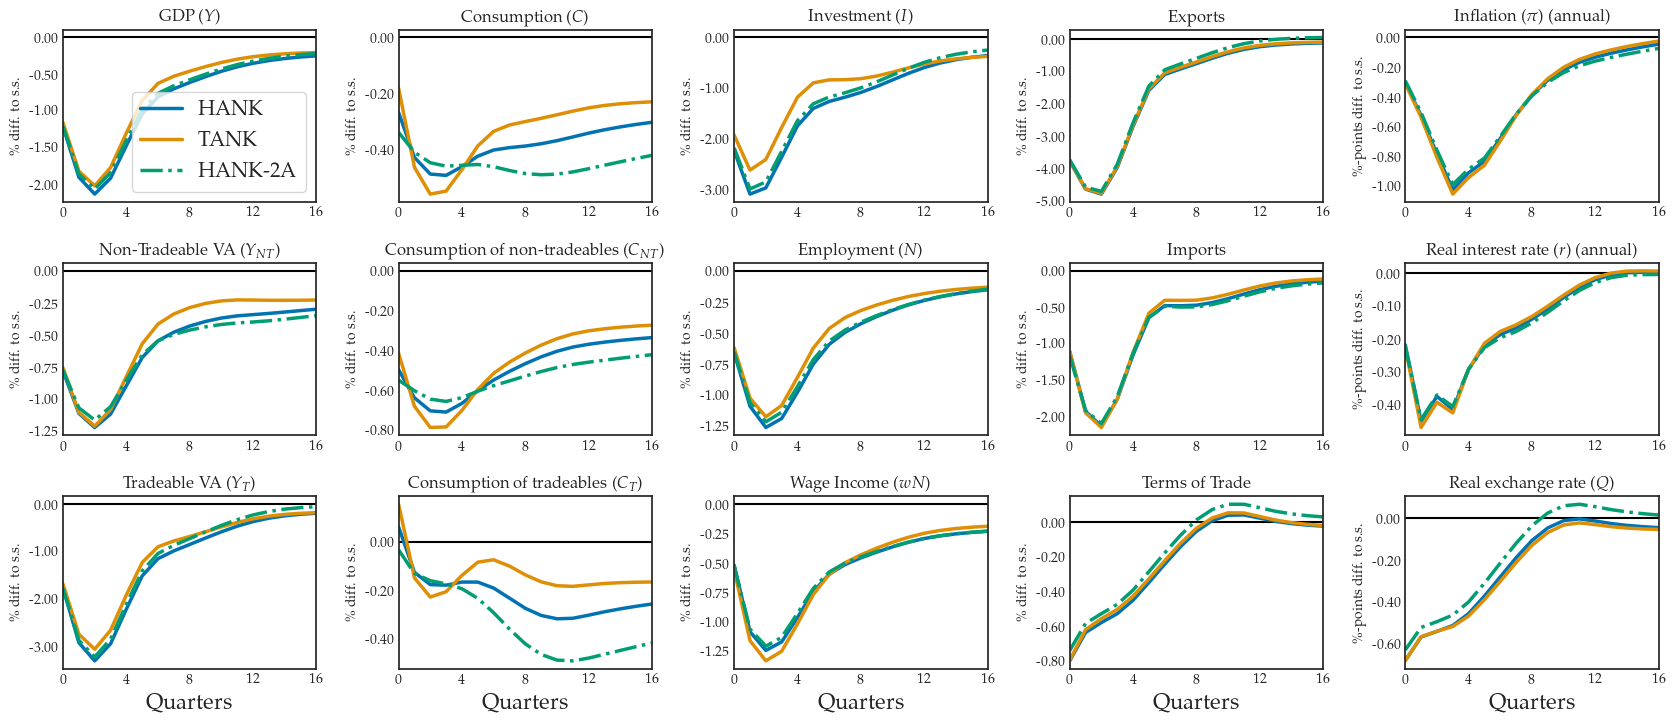

In [5]:
lstyles = ['-', '-', '-.']
colors = ['C0','C1', 'C2']
lwidth = 2.5
labels =  ['HANK','TANK','HANK-2A']

fig = figs.show_IRFs(models=[model_HANK,model_TANK,model_HANK2A],paths='standard',labels=labels,
                     lwidth=lwidth,lstyles=lstyles,colors=colors,figsize=[3.4,2.5])   

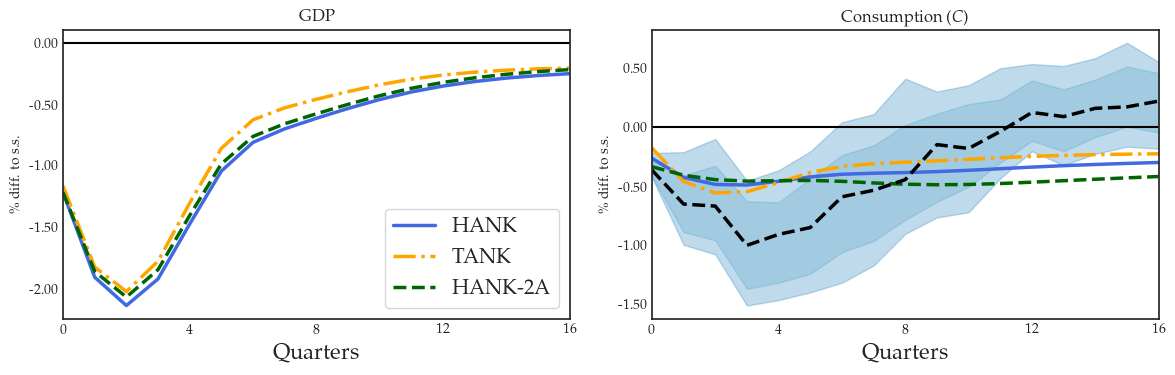

In [6]:
paths = ['GDP','C']
fig = figs.show_IRFs_vs_data(models=[model_HANK,model_TANK,model_HANK2A],paths=paths,labels=labels,
                            maxcol=2,figsize=[6,4],data=model_HANK.data)   

fig.savefig('plots/HH_IRFs.pdf')

Decompose C response in one and two-asset models 

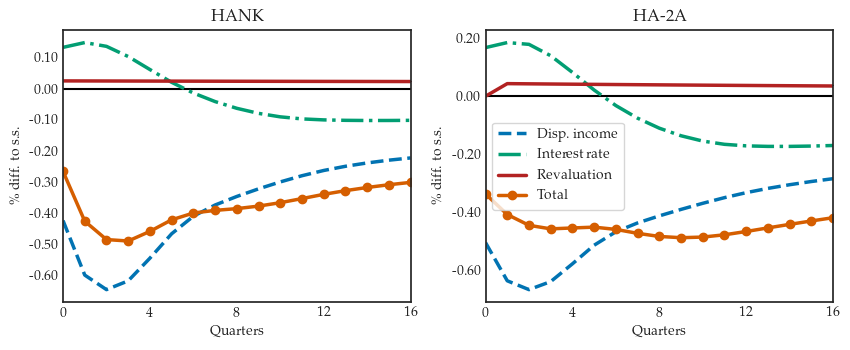

In [7]:
fig = figs.C_decomp_HA_v_RA([model_HANK, model_HANK2A],T_max=17,lwidth=2.5,disp_income=True)

## 5. <a id='toc5_'></a>[Test of $\chi$](#toc0_)

In [8]:
# models_2A_chi = copies(model_HANK2A,[{'chi':model_HANK2A.par.chi/2},{'chi':model_HANK2A.par.chi/3}],find_ss=True,skip_hh=False)

In [9]:
# labels =  ['baseline'] + [f'$\chi$ = {model.par.chi:.4f}' for model in models_2A_chi[1:]]
# paths = figs.paths_defaults['standard']
# fig = figs.show_IRFs(models=models_2A_chi,paths=paths,labels=labels,figsize=[3.4,2.5])   